In [1]:
from fc import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from keras import backend as K
from keras.optimizers import Adam

import tensorflow as tf
from keras import backend as K

# tf.session specification
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
# config.gpu_options.per_process_gpu_memory_fraction = 0.5

# Create a session with the above options specified.
K.tensorflow_backend.set_session(tf.Session(config=config))

from PIL import Image
import numpy as np

Using TensorFlow backend.


# Option #1: Read Image directly from the image folders

In [2]:
data_dir_oil_wet = './data/SS2_data_200by200/200by200_SS2_OilWet/'
data_dir_water_wet = './data/SS2_data_200by200/200by200_SS2_WaterWet/'
num_images, dim_x = 1600, 200
data_water_wet = np.zeros((num_images, dim_x, dim_x, 3))
data_oil_wet = np.zeros((num_images, dim_x, dim_x, 3))

In [3]:
import glob
ct = 0
for fn in glob.glob(data_dir_water_wet +'*.tif'):
    data_water_wet[ct, ...] = np.array(Image.open(fn))
    ct += 1
    if ct%100 == 0:
        print(ct)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [4]:
ct = 0
for fn in glob.glob(data_dir_oil_wet +'*.tif'):
    data_oil_wet[ct, ...] = np.array(Image.open(fn))
    ct += 1
    if ct%100 == 0:
        print(ct)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [5]:
data_water_wet.shape

label_water_wet = np.zeros((num_images,2))
label_water_wet[:, 0] = 1.
label_oil_wet = np.zeros((num_images,2))
label_oil_wet[:, 1] = 1.

all_data_raw = np.append(data_water_wet, data_oil_wet, axis=0)
all_label_raw = np.append(label_water_wet, label_oil_wet, axis=0)

## Shuffle and Divide Data into Train, Val, Test

In [6]:
## Shuffle and Divide Data into Train, Val, Test
np.random.seed(1)
randomize = np.array (np.arange(all_data_raw.shape[0]))
np.random.shuffle(randomize)
all_data = all_data_raw[randomize] / 255.
all_label = all_label_raw[randomize]

num_train, num_eval, num_test = 3000, 100, 100

train_data = all_data[:num_train, ...]
train_label = all_label[:num_train, :]

eval_data = all_data[num_train:(num_train+num_eval), ...]
eval_label = all_label[num_train:(num_train+num_eval):, :]

test_data = all_data[-num_test:, ...]
test_label = all_label[-num_test:, :]

print('Train Data Set',train_data.shape)
print('Validation Data Set',eval_data.shape)
print('Test Data Set', test_data.shape)

print('Train Data Label', train_label.shape)
print('Validation Data Label', eval_label.shape)
print('Test Data Label', test_label.shape)

Train Data Set (3000, 200, 200, 3)
Validation Data Set (100, 200, 200, 3)
Test Data Set (100, 200, 200, 3)
Train Data Label (3000, 2)
Validation Data Label (100, 2)
Test Data Label (100, 2)


# Option#2: Read images From Saved Data From CONV_Model NoteBook

In [7]:
#import h5py

In [8]:
#fn = h5py.File('./saved_models/rock_image_ss2_200x200_onehotlabels.h5', 'r')
#train_data = np.array(fn['train'])
#train_label = np.array(fn['train_label'])
#eval_data = np.array(fn['eval'])
#eval_label = np.array(fn['eval_label'])
#test_data = np.array(fn['test'])
#test_label = np.array(fn['test_label'])
#fn.close()

In [9]:
train_data.shape

(3000, 200, 200, 3)

In [10]:
train_label.shape

(3000, 2)

### Plot images 

In [11]:
import matplotlib.pyplot as plt

In [12]:
title_dict = {0.0: 'oil wet', 1.0: 'water wet'}

/data/cees/wyun/miniconda3/envs/keras-gpu/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


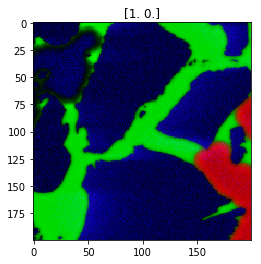

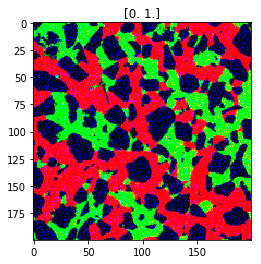

In [13]:
for k in range(2):
    plt.imshow(train_data[k, ...])
    plt.title(train_label[k])
    plt.show()

## Construct FC

In [14]:
dim_x = 200

In [15]:
input_shape =(dim_x, dim_x, 3)
output_dim = 2

In [16]:
fc_model = create_fc(input_shape, output_dim)

In [17]:
fc_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           (None, 200, 200, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               61440512  
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

## Train the model

In [18]:
hist = fc_model.fit(x=train_data, y=train_label, batch_size=50, epochs=20, validation_data=(eval_data, eval_label), verbose=True)

Train on 3000 samples, validate on 100 samples
Epoch 1/20
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4583 - acc: 0.7870 - val_loss: 1.7520 - val_acc: 0.6400
Epoch 2/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3266 - acc: 0.8553 - val_loss: 2.2792 - val_acc: 0.6400
Epoch 3/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.2058 - acc: 0.9123 - val_loss: 2.1807 - val_acc: 0.6600
Epoch 4/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1420 - acc: 0.9473 - val_loss: 2.1201 - val_acc: 0.6800
Epoch 5/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1065 - acc: 0.9593 - val_loss: 0.9684 - val_acc: 0.8000
Epoch 6/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1013 - acc: 0.9617 - val_loss: 1.0414 - val_acc: 0.7900
Epoch 7/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0735 - acc: 0.9737 - val_loss: 1.6204 - val_acc: 0.7200
Epoch 8/20
3000

# Option: Save trained model

In [19]:
#cnn_model.save_weights('./saved_models/cnn_carb_200x200_onehotlabel.h5')
#fc_model.save_weights('./saved_models/fc_ss2_200x200_onehotlabel.h5')

## Plot the training process

In [20]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

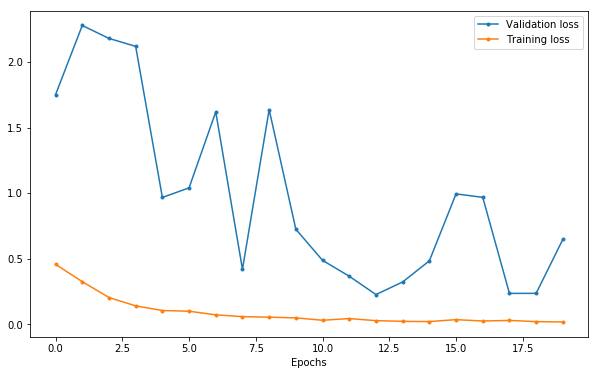

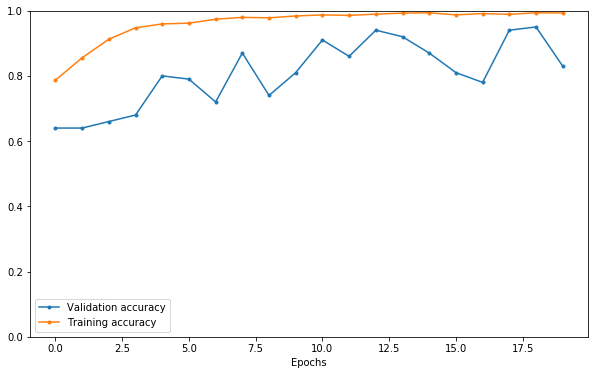

In [21]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_loss'], marker='.')
plt.plot(hist.history['loss'], marker='.')
plt.legend(['Validation loss', 'Training loss'])
plt.xlabel('Epochs')
# plt.ylim([0,1])
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_acc'], marker='.')
plt.plot(hist.history['acc'], marker='.')
plt.ylim([0,1])
plt.xlabel('Epochs')
plt.legend(['Validation accuracy', 'Training accuracy'])
plt.show()

In [22]:
import pickle

In [23]:
#pickle.dump( hist.history, open( "saved_models/hist_conv_carb_200x200_onehot_label.pickle", "wb" ) )
pickle.dump( hist.history, open( "saved_models/hist_fc_ss2_200x200_onehot_label", "wb" ) )

#### Analyze Accuracy

In [24]:
test_data.shape

(100, 200, 200, 3)

In [25]:
test_label.shape

(100, 2)

In [26]:
test_label_st = np.argmax(test_label, axis=1) # giving indies of max number

In [27]:
test_label_st.shape

(100,)

In [28]:
print(test_label_st) # 1 is oil-wet and 0 is water-wet

[0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0]


In [29]:
test_prob_pred = fc_model.predict(test_data)

In [30]:
test_label_pred = np.argmax(test_prob_pred, axis=1)

In [31]:
test_label_pred.shape

(100,)

In [32]:
print(test_label_pred)

[0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


in test_label, 1 is oil wet and 0 is water wet

##### Calculate False (Incorrect Prediction) + Positive (=waterwet)

In [33]:
test_label_water_wet = test_label_st[np.where(test_label_st==0)]
# True labels for all the actually water wet (==0) samples

In [34]:
np.where(test_label_st==0) #Indies of water-wet image in test_set data

(array([ 0,  1,  3,  4,  8,  9, 10, 11, 13, 14, 16, 17, 20, 21, 23, 25, 26,
        27, 30, 32, 34, 35, 38, 39, 40, 42, 47, 50, 52, 53, 54, 55, 57, 58,
        60, 61, 63, 66, 68, 69, 72, 74, 75, 78, 80, 81, 85, 86, 87, 88, 91,
        92, 93, 96, 97, 98, 99]),)

In [35]:
print(test_label_water_wet.shape)

(57,)


In [36]:
test_label_water_wet_pred = test_label_pred[np.where(test_label_st==0)]
# Predicted labels for all the actually water wet samples in test set

In [37]:
false_negative_water_wet = np.sum(test_label_water_wet_pred != test_label_water_wet) / test_label_water_wet.shape[0]
true_postive_water_wet = np.sum(test_label_water_wet_pred == test_label_water_wet) / test_label_water_wet.shape[0]

In [38]:
print('True-Positive:',true_postive_water_wet, 'False-Negative:',false_negative_water_wet)

True-Positive: 0.7368421052631579 False-Positive: 0.2631578947368421


#### Calculate False (Incorrect Prediction) + Negative (=Oil-Wet)

In [39]:
test_label_oil_wet = test_label_st[np.where(test_label_st==1)]
# True labels for all the actually oil wet samples
test_label_oil_wet_pred = test_label_pred[np.where(test_label_st==1)]
# Predicted labels for all the actually oil wet samples in test set
print(test_label_oil_wet.shape)

(43,)


In [40]:
false_positive_oil_wet = np.sum(test_label_oil_wet_pred != test_label_oil_wet) / test_label_oil_wet.shape[0]
true_negative_oil_wet = np.sum(test_label_oil_wet_pred == test_label_oil_wet) / test_label_oil_wet.shape[0]
print('True-Negative:',true_negative_oil_wet, 'False-Positive:',false_positive_oil_wet)

True-Negative: 0.8372093023255814 False-Negative: 0.16279069767441862


## Plot the saliency map

In [41]:
from keras.losses import binary_crossentropy
import keras.backend as K

def normalize_image(x):
    return (x - x.min()) / (x.max() - x.min())

def plot_saliency_map(saliency_data, ind_correct_score):
    predicted_label = fc_model.predict(saliency_data)
    saliency = K.gradients(fc_model.output[:,ind_correct_score], fc_model.input)[0]
    saliency_evaluator = K.function([fc_model.input], [saliency], updates=None)
    saliency_map = saliency_evaluator([saliency_data])[0]
    saliency_map = np.max(saliency_map, axis=3)
#     print(saliency_data.shape)
#     print(saliency_map.shape)
#     print(ind_correct_score)
    dict_ = {0: 'water wet', 1: 'oil wet'}
    predicted_label = np.argmax(predicted_label)
    normalized_sal_map = normalize_image(saliency_map)
    normalized_sal_map = np.repeat(normalized_sal_map[:,:,:,None],3,axis=3)**1.5
    # Plot
    plt.figure(figsize=(25,9))
    plt.subplot(1,3,1)
    plt.imshow(saliency_data[0,...])
    plt.title('True label:' + dict_[ind_correct_score])
    #plt.colorbar(fraction=0.046)
    plt.subplot(1,3,2)
    plt.set_cmap('gray')
    plt.imshow(saliency_map[0,...])
    plt.title('Predicted label:' + dict_[predicted_label])
    plt.colorbar(fraction=0.046)
    plt.subplot(1,3,3)
    plt.imshow(normalize_image(normalized_sal_map[0, ...] * saliency_data[0, ...]))
    plt.show()

In [42]:
test_ind_correct_score = np.argmax(test_label, axis=1)

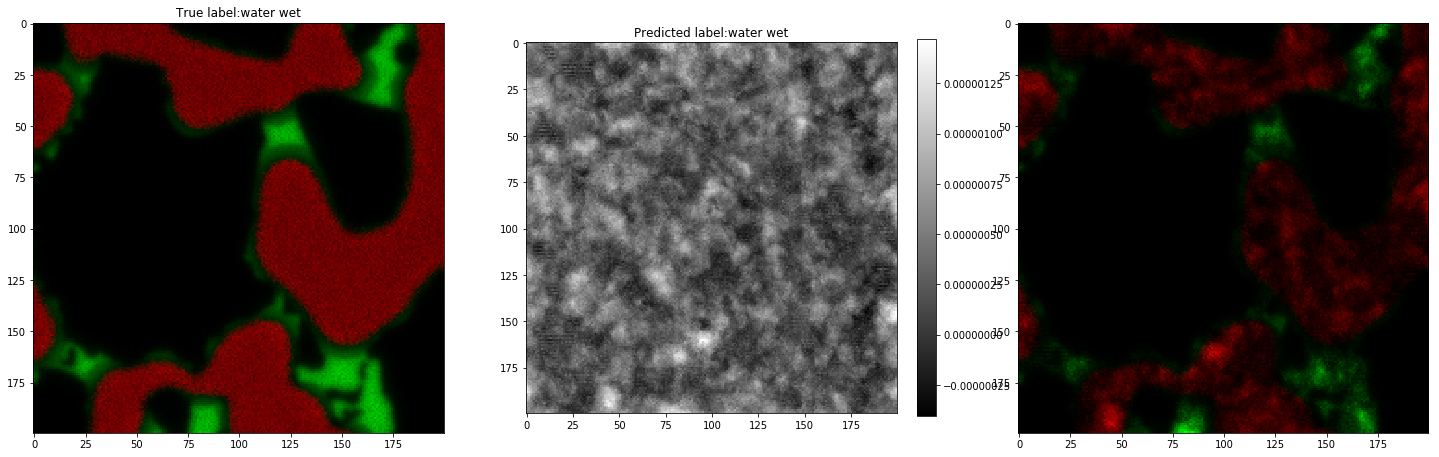

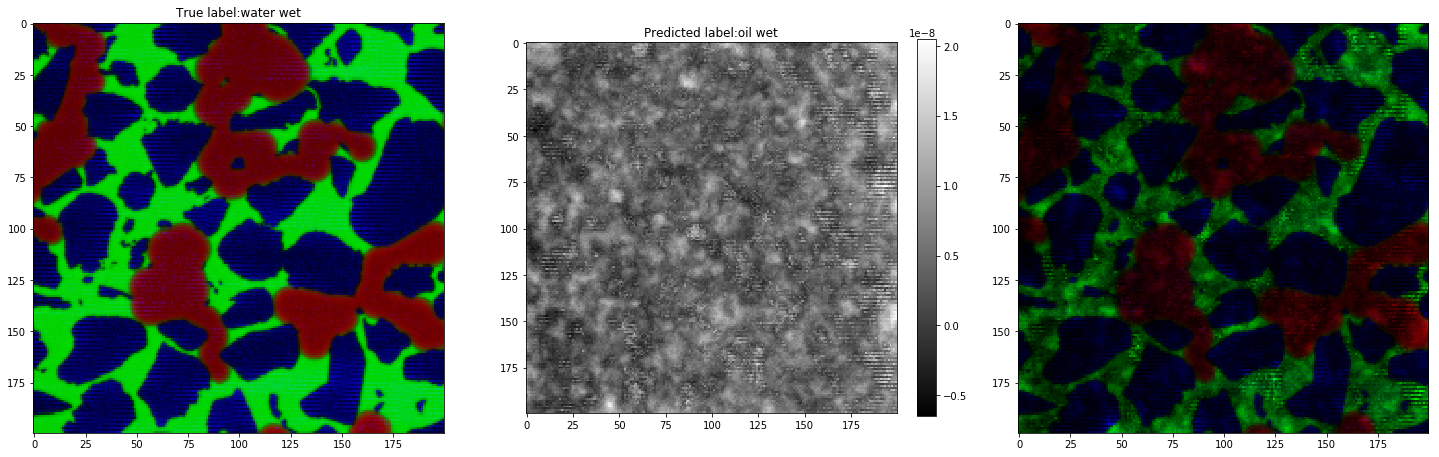

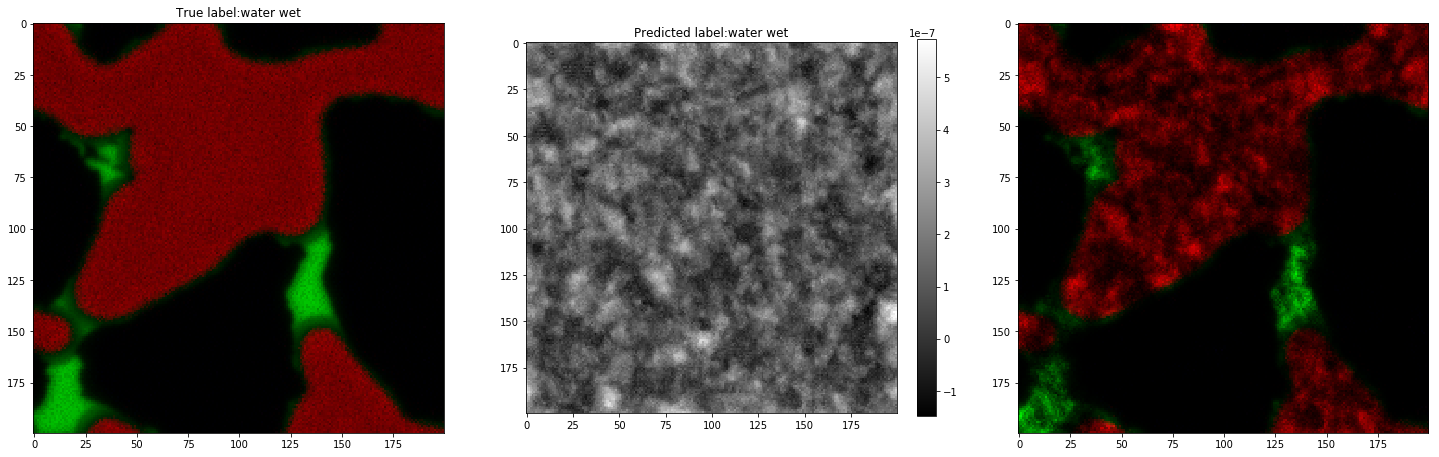

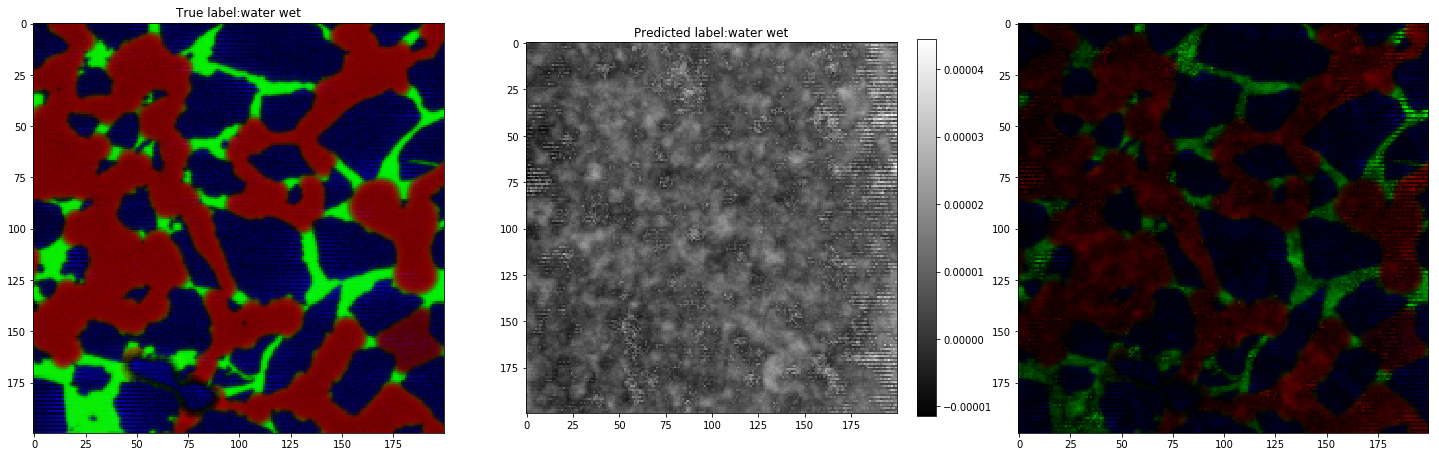

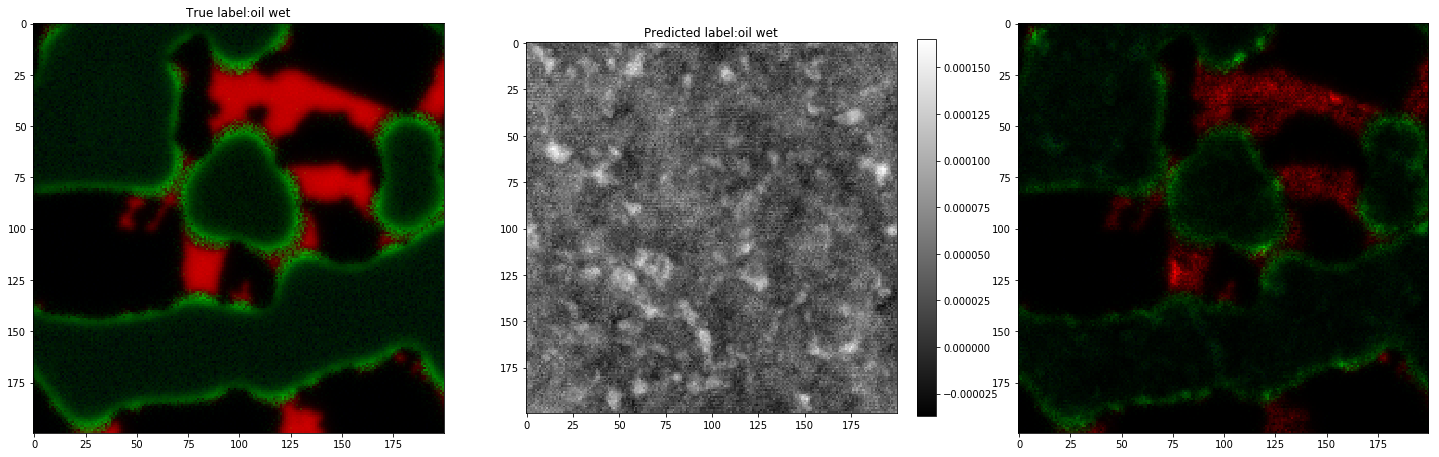

In [43]:
for k in range(70,75):
    plot_saliency_map(test_data[[k], ...], test_ind_correct_score[k])